**Lab 2 Unit 4**

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

**Instructions**
1. Import the necessary libraries if you are starting a new notebook.
2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
3. What should we do with the customer_id column?
4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
    numerical_df = customer_df.select_dtypes()
    categorical_df = customer_df.select_dtypes()
5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

## 1. 

Import the necessary libraries if you are starting a new notebook.

In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## 2.

Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [6]:
customer_df = pd.read_csv("/Users/clark/Desktop/ironhack/labs/unit 4/lab-cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [22]:
customer_df.columns = customer_df.columns.str.lower().str.replace(" ", "_")
customer_df.columns = customer_df.columns.str.replace("employmentstatus","employment_status")
customer_df.columns = customer_df.columns.str.replace("customer","customer_id")
customer_df.head()

,customer_id,state,customer_id_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 3.

What should we do with the customer_id column?

In [23]:
customer_df['customer_id']

0       BU79786
1       QZ44356
2       AI49188
3       WW63253
4       HB64268
         ...   
9129    LA72316
9130    PK87824
9131    TD14365
9132    UP19263
9133    Y167826
Name: customer_id, Length: 9134, dtype: object

In [26]:
customer_df1 = customer_df.copy()

In [29]:
# separate the letters from the numbers
# create 'customer_1' for letters and 'customer_2' for numbers

customer_df1['customer_id1'] = customer_df1['customer_id'].apply(lambda x: x[:2])
customer_df1['customer_id2'] = customer_df1['customer_id'].apply(lambda x: int(''.join(filter(str.isdigit, x))) if x.strip() else 0)

customer_df1

,customer_id,state,customer_id_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,customer_id1,customer_id2
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,BU,79786
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,QZ,44356
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,AI,49188
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,WW,63253
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,HB,64268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,LA,72316
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,PK,87824
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,TD,14365
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,UP,19263


In [31]:
customer_df1[['customer_id', 'customer_id1', 'customer_id2', 'state', 'customer_id_lifetime_value', 'response', 'coverage', 'education',
                'effective_to_date', 'employment_status', 'gender', 'income', 'location_code',
                'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
                'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies',
                'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
                'vehicle_class', 'vehicle_size']]

,customer_id,customer_id1,customer_id2,state,customer_id_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,BU,79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,QZ,44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,AI,49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,WW,63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,HB,64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,LA,72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,PK,87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,TD,14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,UP,19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## 4.

Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.: numerical_df = customer_df.select_dtypes() categorical_df = customer_df.select_dtypes()

In [9]:
# continuous variables
numerical_df = customer_df.select_dtypes(include=['float64', 'int64'])

# categorical variables
categorical_df = customer_df.select_dtypes(include=['object'])

## 5.

Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target (which is numerical) on the Y-axis

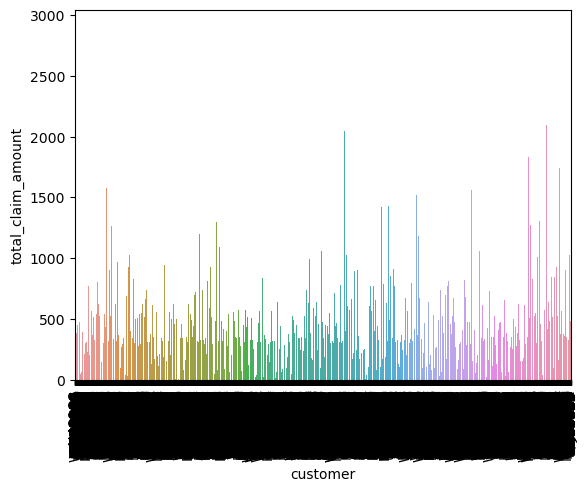

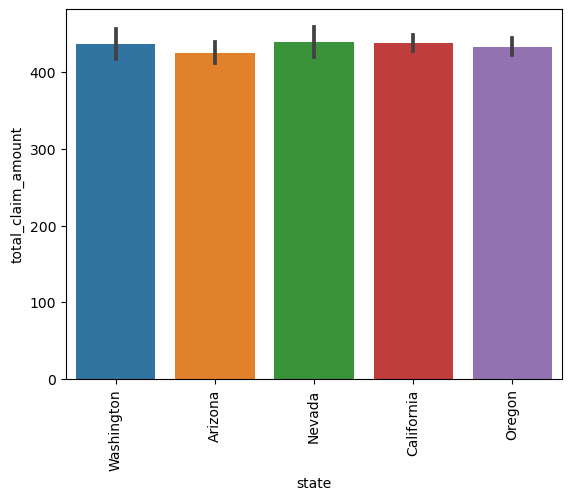

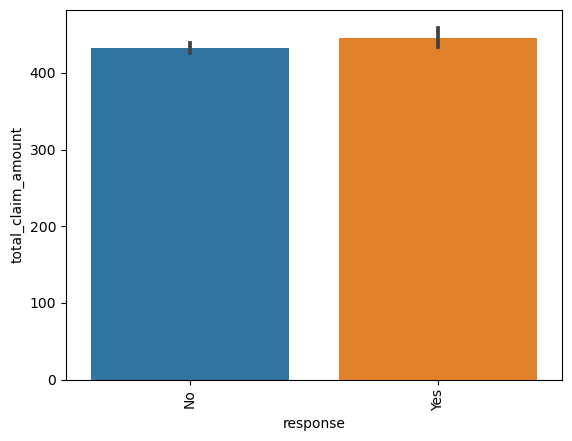

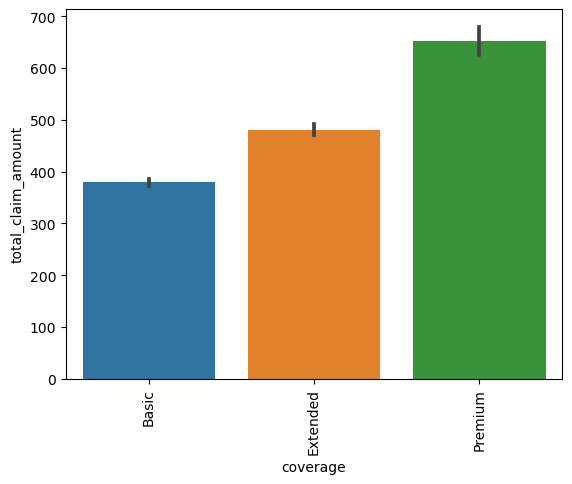

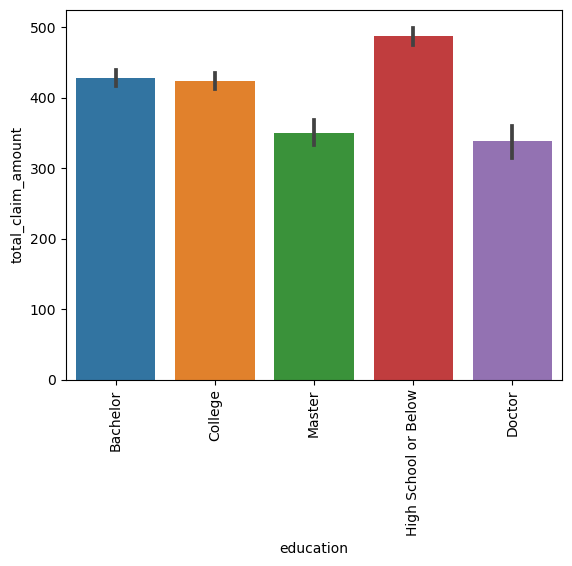

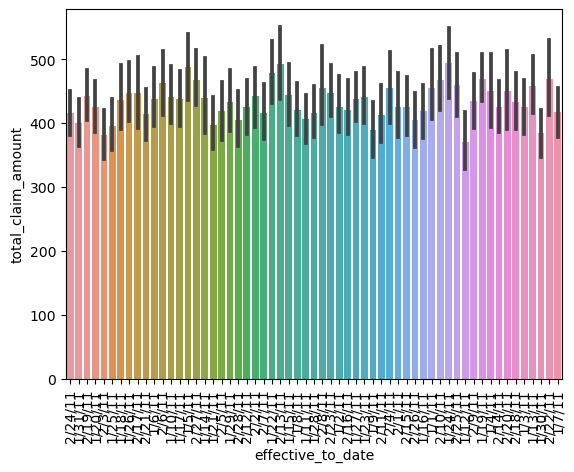

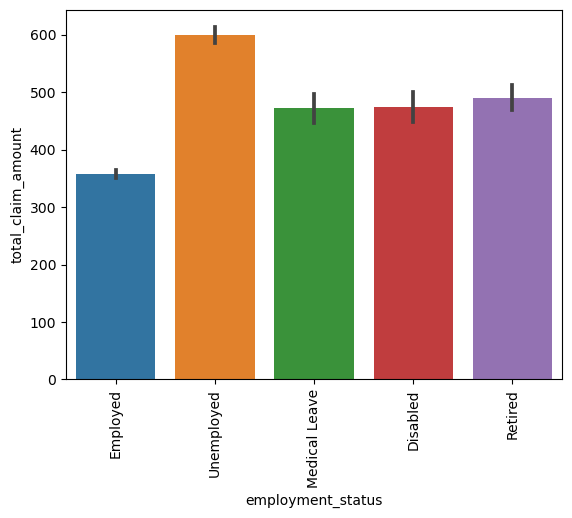

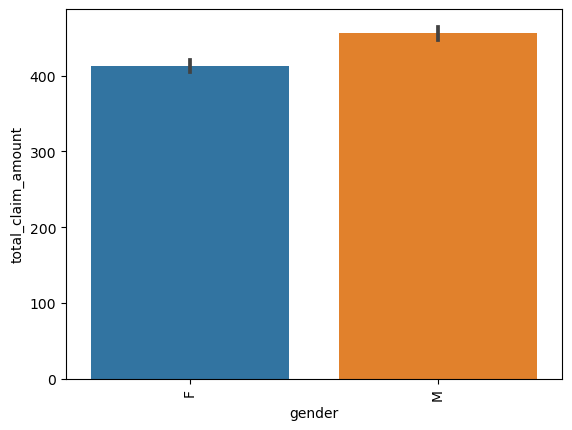

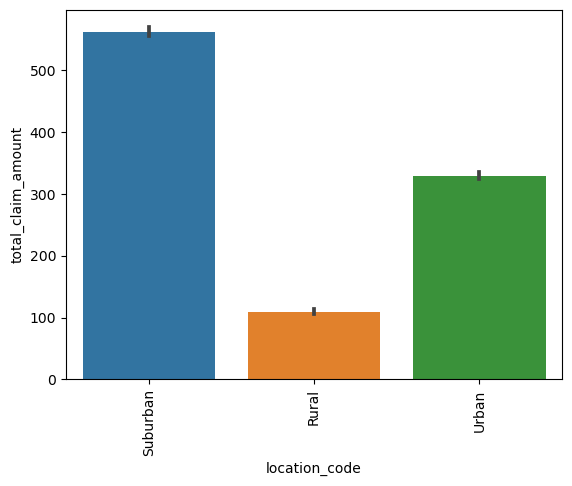

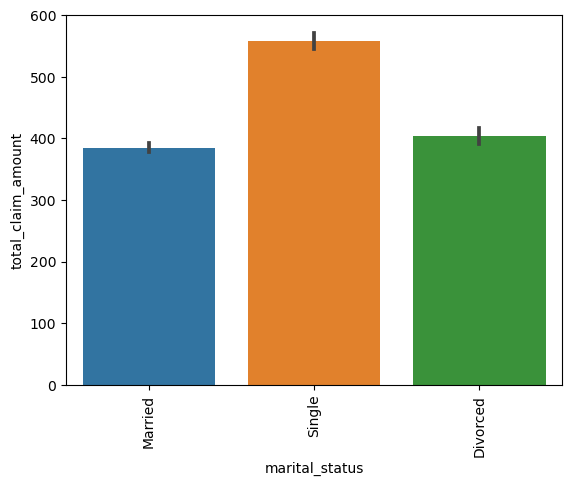

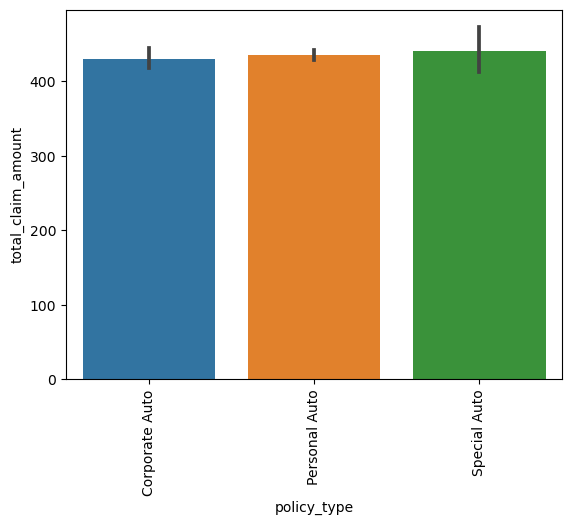

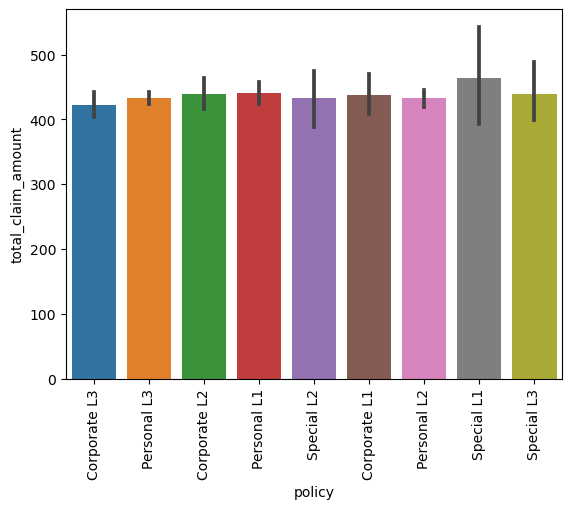

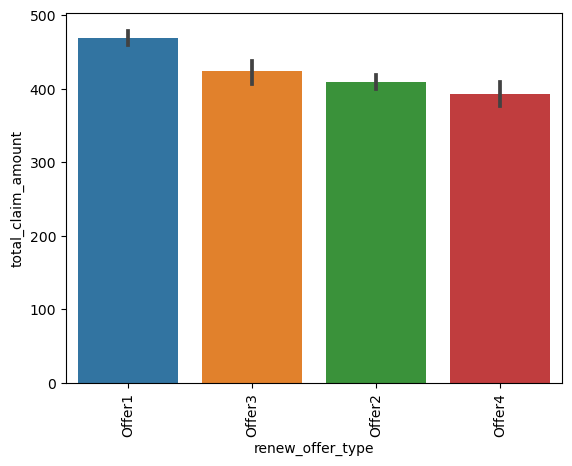

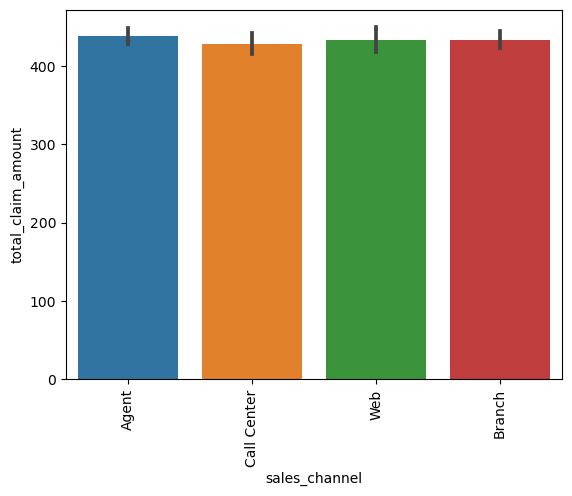

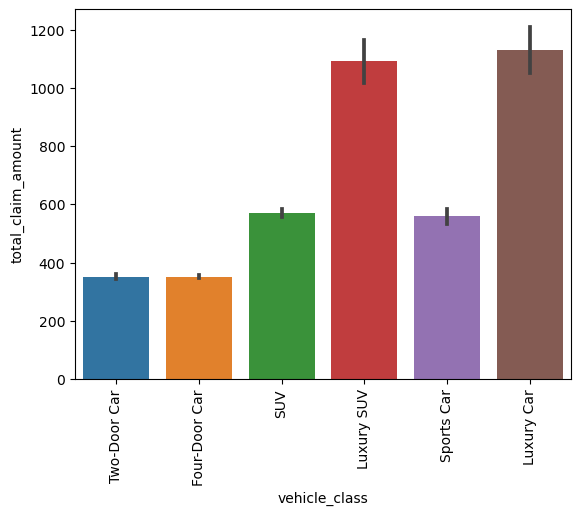

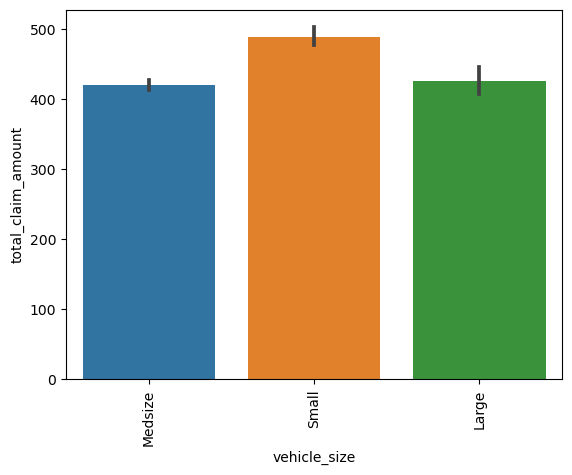

In [12]:
for col in categorical_df.columns:
  sns.barplot(x=categorical_df[col], y=customer_df["total_claim_amount"])
  plt.xticks(rotation=90)
  plt.show()

## 6.

For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [13]:
categorical_df

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [32]:
for column in categorical_df.columns:
    print(f"Column: {column}")
    print(categorical_df[column].value_counts())
    print("--------------------")

Column: customer
customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64
--------------------
Column: state
state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
--------------------
Column: response
response
No     7826
Yes    1308
Name: count, dtype: int64
--------------------
Column: coverage
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
--------------------
Column: education
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
--------------------
Column: effective_to_date
effective_to_date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/2

In [33]:
# the output helps me identify by looping in it to see if there's any results that need cleaning, overall all seems fine, no need to clean anything